# importing  necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\RO20121097\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [22]:
df_train=pd.read_csv('Res_train.csv')
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [23]:
df_test=pd.read_csv('Res_test.csv')
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [24]:
#EDA using D-tale library

import dtale
dtale.show(df_train)
# d.open_browser()

In [25]:
df_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


Text(0.5, 1.0, 'Heat Map')

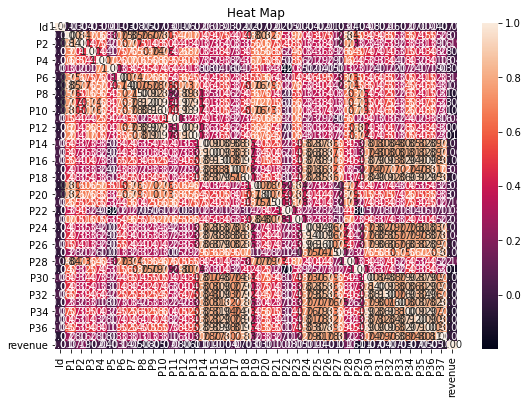

In [26]:
plt.figure(figsize=(9,6))
sb.heatmap(df_train.corr(),annot=True,fmt='.2f')
plt.title('Heat Map')

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

# Featuring Engineering

In [28]:
#Extracting year from date field
df_train['Year']=pd.to_datetime(df_train['Open Date']).dt.year
df_train['Year']

0      1999
1      2008
2      2013
3      2012
4      2009
       ... 
132    2008
133    2006
134    2006
135    2010
136    2009
Name: Year, Length: 137, dtype: int64

In [29]:
#Adding new feature of year difference
import datetime
current_year = datetime.datetime.now().year
df_train['Year_diff']=current_year-df_train['Year']
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Year,Year_diff
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,1999,22
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,2008,13
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2013,8
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2012,9
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,2009,12


In [30]:
#Dropping additonal fields
df_train.drop(['Open Date','Year','City','Id'],inplace=True,axis=1)

In [31]:
df_train.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year_diff
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,22
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,13
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,8
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,9
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,12


In [32]:
column_names=df_train.columns.to_list()
column_names.remove('revenue')
column_names

['City Group',
 'Type',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'Year_diff']

In [33]:
#Missing value treatment

def check_missing(df,src_col):
    print(f"{df[src_col].isnull().sum()}")

for col in column_names:
    check_missing(df_train,col)



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
#Encoding City group and type columns
df_train['City Group']=np.where(df_train['City Group']=='Big Cities',1,0)

In [39]:
df_train['Type']=np.where(df_train['Type']=='FC',1,
                         np.where(df_train['Type']=='IL',2,3))
df_train.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year_diff
0,1,2,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,22
1,1,1,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,13
2,0,2,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,8
3,0,2,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,9
4,0,2,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,12


In [41]:
X=df_train[column_names]
y=df_train[['revenue']]

In [42]:
#Standard scaler 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)



C:\Users\RO20121097\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\RO20121097\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.



array([[ 0.86971849,  1.06881426, -0.00503441, ...,  0.18982104,
         1.61595083,  2.41208951],
       [ 0.86971849, -0.88355313, -0.00503441, ..., -0.53255348,
        -0.62592526,  0.1691737 ],
       [-1.14979733,  1.06881426, -0.69474921, ..., -0.53255348,
        -0.62592526, -1.07689064],
       ...,
       [-1.14979733, -0.88355313, -0.34989181, ..., -0.53255348,
        -0.62592526,  0.66759943],
       [ 0.86971849, -0.88355313, -0.00503441, ..., -0.53255348,
        -0.62592526, -0.32925204],
       [ 0.86971849, -0.88355313, -0.00503441, ..., -0.53255348,
        -0.62592526, -0.08003917]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating model to train

# Model 1

In [51]:

model1 = Sequential()

# The Input Layer :
model1.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
model1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model1.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model1.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               5248      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 170,113
Trainable params: 170,113
Non-trainable params: 0
_________________________________________________________________


In [52]:
#fit model

model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)


Epoch 1/100
3/3 [==============================] - 4s 905ms/step - loss: 4590988.8750 - mean_absolute_error: 4590988.8750 - val_loss: 3829119.2500 - val_mean_absolute_error: 3829119.2500
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 4344346.1875 - mean_absolute_error: 4344346.1875 - val_loss: 3829115.2500 - val_mean_absolute_error: 3829115.2500
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 4382619.6875 - mean_absolute_error: 4382619.6875 - val_loss: 3829105.2500 - val_mean_absolute_error: 3829105.2500
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 4389828.5000 - mean_absolute_error: 4389828.5000 - val_loss: 3829083.2500 - val_mean_absolute_error: 3829083.2500
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 4564505.1250 - mean_absolute_error: 4564505.1250 - val_loss: 3829038.7500 - val_mean_absolute_error: 3829038.7500
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - los

Epoch 45/100
3/3 [==============================] - 0s 34ms/step - loss: 2195871.1875 - mean_absolute_error: 2195871.1875 - val_loss: 1140159.6250 - val_mean_absolute_error: 1140159.6250
Epoch 46/100
3/3 [==============================] - 0s 39ms/step - loss: 1866417.0000 - mean_absolute_error: 1866417.0000 - val_loss: 1167981.2500 - val_mean_absolute_error: 1167981.2500
Epoch 47/100
3/3 [==============================] - 0s 28ms/step - loss: 1984402.7188 - mean_absolute_error: 1984402.7188 - val_loss: 1174600.0000 - val_mean_absolute_error: 1174600.0000
Epoch 48/100
3/3 [==============================] - 0s 37ms/step - loss: 1863917.8750 - mean_absolute_error: 1863917.8750 - val_loss: 1155969.2500 - val_mean_absolute_error: 1155969.2500
Epoch 49/100
3/3 [==============================] - 0s 30ms/step - loss: 1915641.5312 - mean_absolute_error: 1915641.5312 - val_loss: 1131656.3750 - val_mean_absolute_error: 1131656.3750
Epoch 50/100
3/3 [==============================] - 0s 34ms/step 

Epoch 89/100
3/3 [==============================] - 0s 28ms/step - loss: 1696729.4062 - mean_absolute_error: 1696729.4062 - val_loss: 1263243.6250 - val_mean_absolute_error: 1263243.6250
Epoch 90/100
3/3 [==============================] - 0s 32ms/step - loss: 1655106.2500 - mean_absolute_error: 1655106.2500 - val_loss: 1250294.1250 - val_mean_absolute_error: 1250294.1250
Epoch 91/100
3/3 [==============================] - 0s 25ms/step - loss: 1636867.4688 - mean_absolute_error: 1636867.4688 - val_loss: 1240718.6250 - val_mean_absolute_error: 1240718.6250
Epoch 92/100
3/3 [==============================] - 0s 35ms/step - loss: 1523063.1250 - mean_absolute_error: 1523063.1250 - val_loss: 1235824.8750 - val_mean_absolute_error: 1235824.8750
Epoch 93/100
3/3 [==============================] - 0s 31ms/step - loss: 1683211.5000 - mean_absolute_error: 1683211.5000 - val_loss: 1235597.0000 - val_mean_absolute_error: 1235597.0000
Epoch 94/100
3/3 [==============================] - 0s 25ms/step 

# Model 2
#using cross validation method 

In [54]:
# define base model
def baseline_model():
    # create model
    model2 = Sequential()
    model2.add(Dense(16, input_dim= X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model2.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model2.compile(loss='mean_squared_error', optimizer='adam')
    return model2

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
17/17 [==============================] - 2s 3ms/step - loss: 24628883182933.3320
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 35547073245639.1094
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 24512023873308.4453
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 26605573024426.6680
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 27586055081528.8906
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 21492548734520.8906
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 28566346414307.5547
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 22936015951189.3320
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 26731833458688.0000
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 21721086398008.8906
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - l

17/17 [==============================] - 0s 2ms/step - loss: 26254663279502.2227
Epoch 75/100
17/17 [==============================] - 0s 2ms/step - loss: 28929506730894.2227
Epoch 76/100
17/17 [==============================] - 0s 2ms/step - loss: 28122593012394.6680
Epoch 77/100
17/17 [==============================] - 0s 2ms/step - loss: 22381537001472.0000
Epoch 78/100
17/17 [==============================] - 0s 2ms/step - loss: 26688762325674.6680
Epoch 79/100
17/17 [==============================] - 0s 2ms/step - loss: 26755543160149.3320
Epoch 80/100
17/17 [==============================] - 0s 2ms/step - loss: 22534480782222.2227
Epoch 81/100
17/17 [==============================] - 0s 2ms/step - loss: 25045275625244.4453
Epoch 82/100
17/17 [==============================] - 0s 3ms/step - loss: 27600088174136.8906
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 20629921085667.5547
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss:

17/17 [==============================] - 0s 2ms/step - loss: 31621837692017.7773
Epoch 47/100
17/17 [==============================] - 0s 3ms/step - loss: 22987303201450.6680
Epoch 48/100
17/17 [==============================] - 0s 2ms/step - loss: 23876188183665.7773
Epoch 49/100
17/17 [==============================] - 0s 1ms/step - loss: 19746420366449.7773
Epoch 50/100
17/17 [==============================] - 0s 1ms/step - loss: 21371614658560.0000
Epoch 51/100
17/17 [==============================] - 0s 2ms/step - loss: 25530568540160.0000
Epoch 52/100
17/17 [==============================] - 0s 2ms/step - loss: 19039197156693.3320
Epoch 53/100
17/17 [==============================] - 0s 2ms/step - loss: 23343642647665.7773
Epoch 54/100
17/17 [==============================] - 0s 1ms/step - loss: 22172768490837.3320
Epoch 55/100
17/17 [==============================] - 0s 2ms/step - loss: 35492267906389.3359
Epoch 56/100
17/17 [==============================] - 0s 2ms/step - loss:

2021-07-15 09:42:49,598 - WARNING  - 5 out of the last 107 calls to <function Model.make_test_function.<locals>.test_function at 0x00000156DEB707B8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 1s 3ms/step - loss: 27451348484096.0000
Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 25792204505088.0000
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 25875717874574.2227
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 23003281635555.5547
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 21132582205667.5547
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 19574355685831.1094
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 22813546818218.6680
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 24486986732885.3320
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 22311150172387.5547
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 20969034641863.1094
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 2559545739

2021-07-15 09:42:56,088 - WARNING  - 6 out of the last 109 calls to <function Model.make_test_function.<locals>.test_function at 0x00000156DEC57A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 5ms/step - loss: 48702068621312.0000
Epoch 1/100
18/18 [==============================] - 2s 2ms/step - loss: 27963825324032.0000
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 21589869792633.2617
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 24419089100584.4219
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 27379619925369.2617
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 27760552464599.5781
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 22397127726133.8945
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 23829013387156.2109
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 33433312200380.6328
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 23570101815834.9492
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 2975899339

18/18 [==============================] - 0s 2ms/step - loss: 30510162006231.5781
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 26557430821510.7383
Epoch 89/100
18/18 [==============================] - 0s 1ms/step - loss: 20767400663794.5273
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 27936439609451.7891
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 21982093950113.6836
Epoch 92/100
18/18 [==============================] - 0s 1ms/step - loss: 22220133009084.6328
Epoch 93/100
18/18 [==============================] - 0s 1ms/step - loss: 27066258285837.4727
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 21541962231592.4219
Epoch 95/100
18/18 [==============================] - 0s 2ms/step - loss: 24779378931173.0508
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 25425054172860.6328
Epoch 97/100
18/18 [==============================] - 0s 2ms/step - loss:

18/18 [==============================] - 0s 2ms/step - loss: 21073895455043.3672
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 28212809805608.4219
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 20427936214824.4219
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 20985339734986.1055
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 19408923325062.7383
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 21560424343659.7891
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 20751226627341.4727
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 19649647014534.7383
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 23992182684833.6836
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 23612133708853.8945
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss:

Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 21251115064050.5273
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 28926203189140.2109
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 23564066433131.7891
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 28724298224693.8945
Epoch 48/100
18/18 [==============================] - 0s 2ms/step - loss: 28664236012166.7383
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 22044514410064.8438
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 26836782891870.3164
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 27915836194816.0000
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 24132653899344.8438
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 28569697503770.9492
Epoch 54/100
18/18 [==============================] - ETA: 0